Machine Learning  spring 2019    Assignment 2
 
student: Ke Zhang
 
ID: 13309986
 
notebook url: 

Introduction:
    
problem:
    Natural Language Processing (NLP) is the use of computers to process, understand and use human languages (such as Chinese, English, French, etc.). It belongs to a branch of artificial intelligence, and is an brunch subject of computer science and linguistics, and is often referred to as computational linguistics. Since natural language is the fundamental symbol that distinguishes human beings from other animals. Without language, human thoughts are impossible to be understood, therefore natural language processing embodies the highest task and realm of artificial intelligence. This means that only when the computer has the ability to deal with natural language, the machine can achieve real intelligence.
    From the perspective of research content, natural language processing includes grammatical analysis, semantic analysis, text comprehension and so on. From the point of view of application, natural language processing has a broad application prospect. Especially in the information age, the application of natural language processing is all-embracing, such as machine translation, handwritten and printed character recognition, speech recognition and text-to-speech conversion, information retrieval, information extraction and filtering, text classification and clustering, public opinion analysis and opinion mining, etc. 
    Sentiment analysis is a computational study of people's views, feelings, emotions, evaluations and attitudes towards products, services, organizations, individuals, problems, events, topics and their attributes. The beginning and rapid development of this field meets with the development of social media, such as reviews, blogs, Twitter and social networks, since it is the first time in human history that such a large number of views and data are recorded in digital form. As early as 2000, sentiment analysis has become one of the most active research fields in NLP. It has been widely studied in data mining, Web mining, text mining and information retrieval. In fact, because of its overall importance to business and society, it has expanded from computer science to management and sociology, such as marketing, finance, politics, communication, health science, and even history. The reason for this development lies in the fact that viewpoint is the core of almost all human activities and an important influencing factor of human behavior. Our beliefs, perceptions of reality, and decisions we make depend heavily on how others see and evaluate the world. Therefore, when we make decisions, we usually seek the opinions of others. Not only individuals, but also organizations.
    
Algoritm：
    1. Convert words into word list and word vectors which is called word embedding.
    2. Use LSTM model to classify which is positive while which is negative
    


In [4]:
#import needed library
import numpy as np
import matplotlib.pyplot as plt


#const variables
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

numDimensions = 50
maxLength = 200
validateSize = 5000 #validate data set size
num_files = 40000 #train data set size: pos + neg
testDataSize = 6000 # test data set size

In [6]:
#read wordlist and wordVector files
wordVectors = np.load('glove.6B.50d.npy')
print("wordVectors shape:", wordVectors.shape)
f = open("gloveWordList.txt", "r")
wordsList = f.read().split("\n")
print(len(wordsList))

wordVectors shape: (399999, 50)
400000


In [23]:
# process sentence, test if the word list and wordVector are valid to use
s = "my name is hello world" #this is test case
si = np.zeros(maxLength, dtype='int32')
s = s.strip().split()  # strip: remove white space in head and tail of string
for i in range(len(s)):
    si[i] = wordsList.index(s[i])
print(si.shape)
print(si)
for i in range(len(s[i])):
    print(wordVectors[si[i]])

(200,)
[  191   310    13 13074    84     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0  

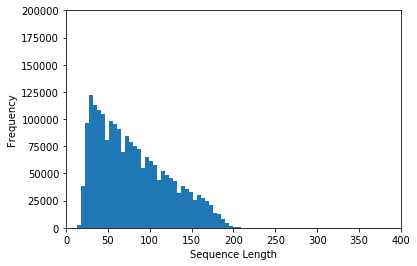

In [7]:
#to confirm how many words in one sentence
numWords = []
with open("train.ft.txt","r",encoding='utf-8') as f:
    while True:
        line = f.readline()
        if not line:
            break
        counter = len(line.split())
        numWords.append(counter)

plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 400, 0, 200000])
plt.show()

after the run of last cell, we know that most of the words in every sentence are not less than 200, so we can set the max length of our vector as 200.

Next, we will try one sentence into vector. First, split the sentence into words and store them in an array named "split", and iterate each word in the array and lookup the word in word list to get its index. Then store the index into a temp array named "tmp". show tmp to make sure we can convert a sentence into matrix.

In [8]:
#test if can transfer one sentence into id matrix
record = "__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^"
tmp = np.zeros(maxLength,dtype='int32')
indexCounter = 0
line = record
#cleanedLine = cleanSentances(line)
split = line.split()
for word in split:
    try:
        tmp[indexCounter] = wordsList.index(word)
    except ValueError:
        tmp[indexCounter] = 0
    indexCounter = indexCounter + 1
print(tmp)

[     0      0    150      9      0      0      0   1506   1007     14
      0      0  17720      0      0      5    391   1675     99    142
      0     53      0     19    150      3     68     37   5280      0
    185      0      0     32    333      0    185      0      0     33
     65      2     63      2      0    289      0     32    660    333
     19     30      0    253      0      0   5671    419     24   2240
 192640      4   1143      6  38258   1064     16  38997  12751      4
  29396      0      0     53  15113   1543     37  12538      3      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

Next, we will put all sentences in train.tf.txt into matrix. In the file, label_2 means positive while label_1 means negative. we divide all sentence into positive array and negative array. In this experiment, we just use 20k positive sentences and 20k negative sentences since the original file is too big. 

How we convert ids into matrix? we create a matrix named ids and initialize it with all zeros and the size is num_files * maxLength. It means there are num_files(40000) rows and maxLength(200) cols. After called the function get_ids(), the result will be stored into a file called "my_ids2" for future use.

Note: This step takes me 3 hours to run, so I save it in file and load the file every time I want to use it.

In [ ]:
#WARNING: this part will take a few hours !!!!!!!!!
#you do not have to run this cell because I have save the result in file "my_ids2"
# put sentances into 2 containers: positive, negtive
positive = []
negative = []

with open("train.ft.txt", "r", encoding='utf-8') as f:
    while True:
        line = f.readline()
        if not line:
            break
        if line[0:10] == "__label__2":
            positive.append(line)
        elif line[0:10] == "__label__1":
            negative.append(line)

positive = positive[:20000]
negative = negative[:20000]

def get_sentence_ids(sentence, ids, sentence_index):
    index_counter = 0
    split_sentence = sentence.split()
    for word in split_sentence:
        try:
            ids[sentence_index][index_counter] = wordsList.index(word)
        except ValueError:
            ids[sentence_index][index_counter] = 0
        index_counter += 1
        if index_counter >= maxLength:
            break

ids = np.zeros((num_files, maxLength), dtype='int32')

def get_ids():
    sentence_index = 0
    for sentence in positive:
        print("Processing new positive record", sentence_index)
        get_sentence_ids(sentence, ids, sentence_index)
        sentence_index = sentence_index + 1
    for sentence in negative:
        print("Processing new negative record", sentence_index)
        get_sentence_ids(sentence, ids, sentence_index)
        sentence_index = sentence_index + 1

get_ids()
output_file = "my_ids2"
np.save(output_file, ids)
print("Save successfully.")

Next step is the same as the above to make validate date set matrix. Set 2500 positive and 2500 negative

In [ ]:
#WARNING: this part will take a few hours !!!!!!!!!
#you do not have to run this cell because I have save the result in file "my_ids_validate"
#create validate data file
positive = []
negative = []
ids = np.zeros((validateSize, maxLength), dtype='int32')

with open("test.ft.txt", "r", encoding='utf-8') as f:
    while True:
        line = f.readline()
        if not line:
            break
        if line[0:10] == "__label__2":
            positive.append(line)
        elif line[0:10] == "__label__1":
            negative.append(line)

positive = positive[:2500]
negative = negative[:2500]

get_ids()
output_file = "my_ids_validate"
np.save(output_file, ids)
print("Save successfully.")

Next step is the same as the above to make test date set matrix. For the test data, set 3000 positive and 3000 negative

In [ ]:
#WARNING: this part will take a few hours !!!!!!!!!
#you do not have to run this cell because I have save the result in file "my_ids_test"

positive = []
negative = []
ids = np.zeros((validateSize, maxLength), dtype='int32')

with open("test.ft.txt", "r", encoding='utf-8') as f:
    while True:
        line = f.readline()
        if not line:
            break
        if line[0:10] == "__label__2":
            positive.append(line)
        elif line[0:10] == "__label__1":
            negative.append(line)

positive = positive[2600:5600]
negative = negative[2600:5600]

get_ids()
output_file = "my_ids_test"
np.save(output_file, ids)
print("Save successfully.")

Next step, we define 3 functions which are for train, validate and test. We divide matrix and labels into 2 arrays named "array" and "accurate_label". 

In [17]:
import random

test_ids = np.load('my_ids2.npy') # data set for train
validate_ids = np.load('my_ids_validate.npy') #data set for validate
test_set_ids = np.load('my_ids_test.npy') # data set for test

#train dataset
def get_train_batch():
    accurate_label = []
    array = np.zeros([batchSize, maxLength])
    for index in range(batchSize):
        if index % 2 == 0:
            num = random.randint(1, 20000) #positive
            accurate_label.append([1, 0])
        elif index % 2 == 1:
            num = random.randint(20000, 40000) #negtive
            accurate_label.append([0,1])
        array[index] = test_ids[num-1:num]
    return array,accurate_label

#validate dataset
def get_validate_batch():
    accurate_label = []
    array = np.zeros([batchSize, maxLength])
    for index in range(batchSize):
        num = random.randint(1, validateSize)
        if num <= 2500:
            accurate_label.append([1, 0]) #positive
        else:
            accurate_label.append([0, 1]) #negative
        array[index] = validate_ids[num - 1:num]
    return array, accurate_label

#test data set
def get_test_batch():
    accurate_label = []
    array = np.zeros([batchSize, maxLength])
    for index in range(batchSize):
        num = random.randint(1, testDataSize)
        if num <= 3000:
            accurate_label.append([1, 0]) #positive
        else:
            accurate_label.append([0, 1]) #negative
        array[index] = validate_ids[num - 1:num]
    return array, accurate_label



Next we will train the model. We use LSTM model. First, construct a neural network with 1 layer and 64 units. After the layer, there is dropout operation for not overfitting. After that, set all variables we need. Then, start a session, set tensorboard and train this model.


In [12]:
import datetime
import tensorflow as tf

tf.reset_default_graph()
labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxLength])
data = tf.Variable(tf.zeros([batchSize, maxLength,numDimensions]))
data = tf.nn.embedding_lookup(wordVectors, input_data)
data = tf.cast(data, tf.float32)

# network model
lstm_cell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstm_cell = tf.contrib.rnn.DropoutWrapper(cell=lstm_cell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstm_cell, data, dtype=tf.float32)

# set variables
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0] - 1))
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

# if you want to run this code, please set iterations to 100k+, that will perform well
# for now just set 1000 to run this code quick for this assignment
iterations = 1000
for i in range(iterations):
    # Next Batch of reviews
    #print("trainning: ",i)
    nextBatch, nextBatchLabels = get_train_batch()
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})

    # Write summary to Tensorboard
    if i % 50 == 0:
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)

    # Save the network every 1000 training iterations
    if i % 1000 == 0 and i != 0:
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)

writer.close()

In [15]:
#evaluate 
#validate data set

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

iterations = 100
total = 0

for i in range(iterations):
    #print("i=", i, " ", end='')
    nextBatch, nextBatchLabels = get_validate_batch()
    #print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)
    total += (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100

print("Average Accuracy:", total / iterations)


INFO:tensorflow:Restoring parameters from models/pretrained_lstm.ckpt-9000
Average Accuracy: 50.41666683554649


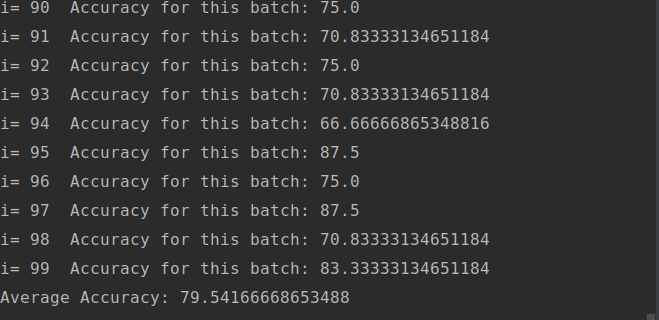

The accuracy is 50 which is just like guess because I set the iteration as 1000 for quick run this code. I have run this code in Ubuntu system for 1 hour.  The accuracy of validate data set is 79.5%. The tensorboard result shows below:

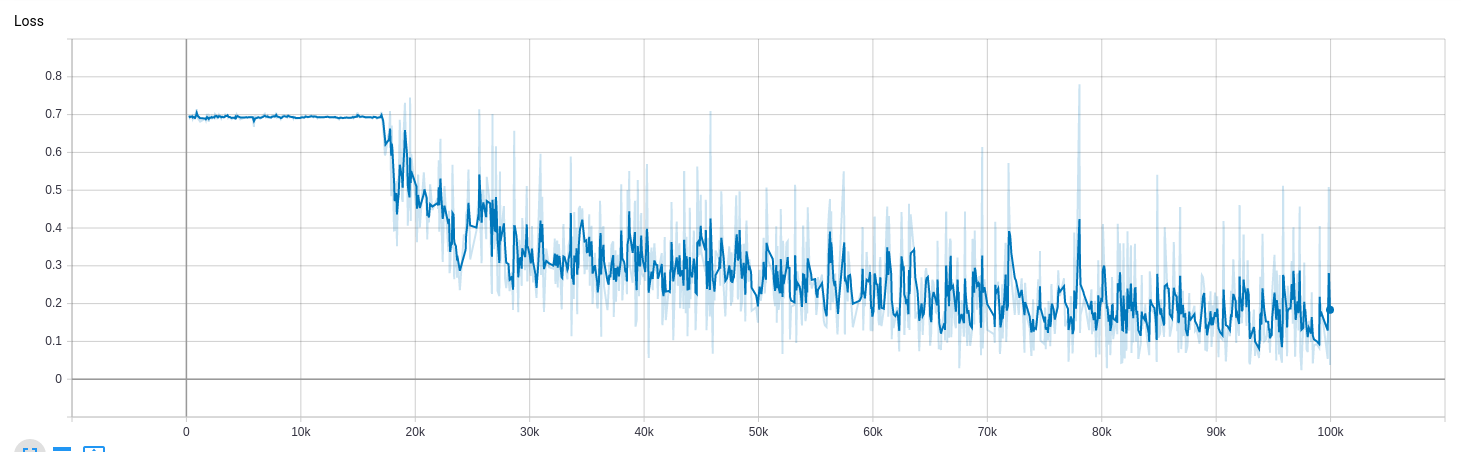

The Loss start to go down at 20k. And it goes down continously.

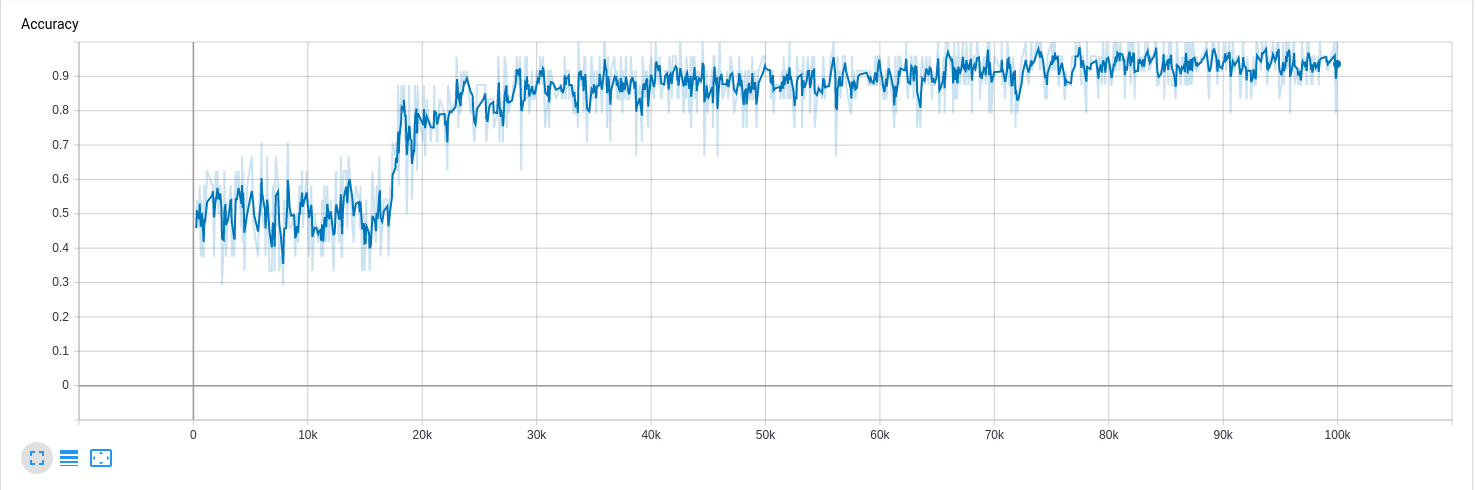


The accuracy start to go up at 20k, and this is why the result accuracy above is only 50. 


Next step, we run this model on test data set to evaluate the model's performance on the data never seen before.

In [19]:
#evaluate on test sataset
#test data set

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

iterations = 100
total = 0

for i in range(iterations):
    #print("i=", i, " ", end='')
    nextBatch, nextBatchLabels = get_test_batch()
    #print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)
    total += (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100

print("Average Accuracy:", total / iterations)

INFO:tensorflow:Restoring parameters from models/pretrained_lstm.ckpt-9000
Average Accuracy: 52.75000020861626


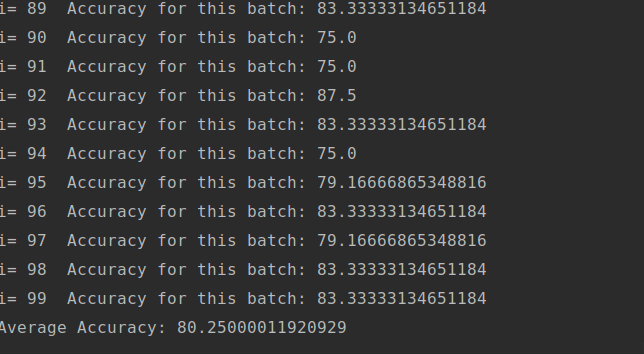

The test result is 52% which is more than validate data set. The result of my previous experiment is 80% accuracy.